# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Read in clustering dataset, note that this one is still missing the aggregated weather data, but this can easily be added in later

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [5]:
df

,Bridge_ID,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21
0,2.12E+13,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]",...,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]"
1,CALHAN-8TH ST.,"[36.0, 97.0, 428, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.3, 97.0, 955, 1949, 2, 11.0, 7.0]","[36.3, 96.9, 955, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]",...,"[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 9.7, 7.3]","[36.3, 97.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 522, 1949, 2, 9.7, 7.3]"
2,CSG-C.80-07.65,"[36.0, 83.9, 417, 1970, 2, 6.6, 6.4]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.3, 76.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 69.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]",...,"[36.3, 62.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 717, 1970, 2, 6.6, 2.9]"
3,CSG-D.04-10.42,"[36.0, 82.0, 1836, 1955, 2, 7.6, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 83.4, 1459, 1955, 2, 7.7, 3.0]","[36.3, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]",...,"[36.3, 72.3, 1295, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 2696, 1955, 2, 7.7, 3.4]"
4,CSG-D.37-15.67,"[36.0, 97.0, 87, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]",...,"[36.3, 98.0, 397, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 99.0, 287, 1984, 2, 12.8, 3.0]","[36.3, 99.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 268, 1984, 2, 12.8, 3.0]"
...

# For the first row of the dataset, plot the sufficiency rating over time

In [6]:
first_row = df.iloc[1]

In [7]:
first_row = first_row.iloc[1:]

In [8]:
first_row

time_0     [36.0, 97.0, 428, 1949, 2, 10.9, 7.3]
time_1     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_2     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_3     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_4     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_5     [36.3, 97.0, 955, 1949, 2, 11.0, 7.0]
time_6     [36.3, 96.9, 955, 1949, 2, 11.0, 7.3]
time_7     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_8     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_9     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_10    [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_11    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_12    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_13    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_14    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_15     [36.3, 97.0, 422, 1949, 2, 9.7, 7.3]
time_16     [36.3, 97.0, 369, 1949, 2, 9.7, 7.3]
time_17     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_18     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_19     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_20     [36.3, 8

In [9]:
import re

non_decimal = re.compile(r'[^\d.]+')

list_of_row_components = []

for i, row in first_row.iteritems():
    current_row_components = row.split(', ')
    current_row_components_replaced = []
    
#     print(current_row_components)
    for idx, component in enumerate(current_row_components):
    #     print(first_row_components[idx])
        result = non_decimal.sub('', current_row_components[idx])
        current_row_components_replaced.append(float(result))
        
#     print(current_row_components_replaced)
    list_of_row_components.append(current_row_components_replaced)

In [10]:
first_row = df.iloc[1]

In [11]:
list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [12]:
first_row = first_row.iloc[1:]

In [13]:
sufficiency_rating_list = []

for row_component in list_of_row_components:
    sufficiency_rating_list.append(row_component[1])

In [14]:
sufficiency_rating_list

[97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0]

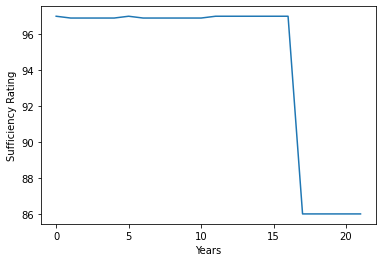

In [15]:
import matplotlib.pyplot as plt

plt.plot(sufficiency_rating_list)
plt.ylabel('Sufficiency Rating')
plt.xlabel('Years')
plt.show()


# Example of first training example

In [16]:
import pandas as pd

var1 = []
var2 = []
var3 = []
var4 = []
var5 = []
var6 = []
varout = []

for element in list_of_row_components:
#     print(element)
    var1.append(element[0])
    var2.append(element[2])
    var3.append(element[3])
    var4.append(element[4])
    var5.append(element[5])
    var6.append(element[6])
    varout.append(element[1])
    
dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

df_temp = pd.DataFrame(dict_temp)

In [17]:
df_temp

,var1,var2,var3,var4,var5,var6,varout
0,36.0,428.0,1949.0,2.0,10.9,7.3,97.0
1,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
2,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
3,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
4,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
5,36.3,955.0,1949.0,2.0,11.0,7.0,97.0
6,36.3,955.0,1949.0,2.0,11.0,7.3,96.9
7,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
8,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
9,36.3,983.0,1949.0,2.0,11.0,7.3,96.9


# Convert each rows into it's own dataframe representing an individual time series example

In [18]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []

for i in range(1, 524):
    
    list_of_row_components = []
    
    current_row = df.iloc[i]
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

    var1 = []
    var2 = []
    var3 = []
    var4 = []
    var5 = []
    var6 = []
    varout = []

    for element in list_of_row_components:

        var1.append(element[0])
        var2.append(element[2])
        var3.append(element[3])
        var4.append(element[4])
        var5.append(element[5])
        var6.append(element[6])
        varout.append(element[1])

    dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

    df_temp = pd.DataFrame(dict_temp)

    list_of_training_df.append(df_temp)

In [19]:
len(list_of_training_df)

523

In [20]:
list_of_training_df[7]

,var1,var2,var3,var4,var5,var6,varout
0,36.0,660.0,1970.0,2.0,11.2,2.4,96.9
1,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
2,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
3,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
4,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
5,36.3,950.0,1970.0,2.0,11.1,2.0,97.0
6,36.3,950.0,1970.0,2.0,11.1,2.4,96.9
7,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
8,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
9,36.3,700.0,1970.0,2.0,11.1,2.6,85.9


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

list_of_scaled_training_df = []
encoder = LabelEncoder()

scaler = MinMaxScaler(feature_range=(0, 1))

for training_df in list_of_training_df:
    temp_df = scaler.fit_transform(training_df)
    list_of_scaled_training_df.append(temp_df)

In [22]:
list_of_scaled_training_df[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

# Single example of a time series example for a single bridge

In [23]:
values = list_of_training_df[7].values

In [24]:
n_train_hours = 21
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21, 1, 6) (21,) (1, 1, 6) (1,)


# Confirm gpu is being used before training

In [25]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [26]:
get_available_gpus()

['/device:GPU:0']

# Build LSTM model

In [27]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
#     tf.keras.layers.LSTM(30, return_sequences=True),
#     tf.keras.layers.LSTM(100, return_sequences=True),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(units=8, activation='relu'),
#     tf.keras.layers.Dense(units=4, activation='relu'),
#     tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [28]:
lstm_model.compile(loss='mse', optimizer='adam')

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run with min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6447 - val_loss: 0.0024
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.6730 - val_loss: 1.0952
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5371 - val_loss: 0.9947
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.0151e-04 - val_loss: 1.6366e-04
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4299 - val_loss: 0.4959
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5811 - val_loss: 0.2064
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3473 - val_loss: 0.2593
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5526 - val_loss: 0.0047
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5178 - val_loss: 0.9686
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1987 - val_loss: 0.0154
EPOCH: 11 OUT OF 1000
(21, 1, 6

EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0317 - val_loss: 0.0320
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1422 - val_loss: 0.0186
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3186 - val_loss: 0.1675
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1147 - val_loss: 7.7978e-04
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3239 - val_loss: 0.3134
EPOCH: 91 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0975 - val_loss: 0.1012
EPOCH: 92 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2704 - val_loss: 0.1502
EPOCH: 93 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1268 - val_loss: 0.0080
EPOCH: 94 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0955 - val_loss: 0.2461
EPOCH: 95 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1810 - val_loss: 0.0058
EPOCH: 96 OUT OF 1000
(21,

EPOCH: 170 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1459 - val_loss: 0.1821
EPOCH: 171 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1040 - val_loss: 0.1806
EPOCH: 172 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1505 - val_loss: 0.1453
EPOCH: 173 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3191 - val_loss: 0.3413
EPOCH: 174 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0454 - val_loss: 0.0458
EPOCH: 175 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2883 - val_loss: 0.1866
EPOCH: 176 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1995 - val_loss: 0.1998
EPOCH: 177 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2868 - val_loss: 0.4394
EPOCH: 178 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2453 - val_loss: 0.1190
EPOCH: 179 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1717 - val_loss: 0.1741
EPOCH: 180 OUT OF 10

1/1 - 0s - loss: 0.0552 - val_loss: 0.0555
EPOCH: 254 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1219 - val_loss: 0.2495
EPOCH: 255 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1723 - val_loss: 0.1836
EPOCH: 256 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5864 - val_loss: 0.6097
EPOCH: 257 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0964 - val_loss: 0.1791
EPOCH: 258 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0841 - val_loss: 0.0586
EPOCH: 259 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2567 - val_loss: 0.3262
EPOCH: 260 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0957 - val_loss: 0.0597
EPOCH: 261 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1406 - val_loss: 0.3159
EPOCH: 262 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0677 - val_loss: 0.0597
EPOCH: 263 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3

1/1 - 0s - loss: 0.1379 - val_loss: 0.0078
EPOCH: 338 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0651 - val_loss: 0.0651
EPOCH: 339 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1806 - val_loss: 0.2280
EPOCH: 340 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1594 - val_loss: 0.2161
EPOCH: 341 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1836 - val_loss: 0.0041
EPOCH: 342 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2848 - val_loss: 0.2706
EPOCH: 343 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3586 - val_loss: 0.2715
EPOCH: 344 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1681 - val_loss: 0.0386
EPOCH: 345 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0478 - val_loss: 6.8006e-07
EPOCH: 346 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0922 - val_loss: 0.0422
EPOCH: 347 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss:

EPOCH: 421 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1455 - val_loss: 0.3508
EPOCH: 422 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0728 - val_loss: 0.0039
EPOCH: 423 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1614 - val_loss: 0.4832
EPOCH: 424 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1187 - val_loss: 0.0065
EPOCH: 425 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2403 - val_loss: 0.5039
EPOCH: 426 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3546 - val_loss: 0.1410
EPOCH: 427 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4352 - val_loss: 0.4500
EPOCH: 428 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1109 - val_loss: 0.0501
EPOCH: 429 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1082 - val_loss: 0.1099
EPOCH: 430 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1271 - val_loss: 0.0377
EPOCH: 431 OUT OF 10

1/1 - 0s - loss: 0.1696 - val_loss: 0.0202
EPOCH: 505 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0474 - val_loss: 0.0444
EPOCH: 506 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0786 - val_loss: 0.2289
EPOCH: 507 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1913 - val_loss: 0.5065
EPOCH: 508 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1801 - val_loss: 0.2623
EPOCH: 509 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1347 - val_loss: 6.9946e-04
EPOCH: 510 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2383 - val_loss: 0.1450
EPOCH: 511 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2668 - val_loss: 0.2628
EPOCH: 512 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2200 - val_loss: 0.3142
EPOCH: 513 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1543 - val_loss: 0.1350
EPOCH: 514 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss:

1/1 - 0s - loss: 0.1855 - val_loss: 0.3253
EPOCH: 589 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3584 - val_loss: 0.3092
EPOCH: 590 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0950 - val_loss: 0.0018
EPOCH: 591 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1756 - val_loss: 0.2045
EPOCH: 592 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1086 - val_loss: 0.1099
EPOCH: 593 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1098 - val_loss: 0.1130
EPOCH: 594 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1978 - val_loss: 0.2087
EPOCH: 595 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1164 - val_loss: 0.0520
EPOCH: 596 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0317 - val_loss: 0.1064
EPOCH: 597 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2213 - val_loss: 0.2245
EPOCH: 598 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

1/1 - 0s - loss: 0.2119 - val_loss: 0.2161
EPOCH: 673 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0635 - val_loss: 0.0354
EPOCH: 674 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1399 - val_loss: 0.1606
EPOCH: 675 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1064 - val_loss: 0.1464
EPOCH: 676 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1227 - val_loss: 4.5266e-04
EPOCH: 677 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1354 - val_loss: 0.1353
EPOCH: 678 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1103 - val_loss: 0.0024
EPOCH: 679 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1887 - val_loss: 0.1065
EPOCH: 680 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2873 - val_loss: 0.3376
EPOCH: 681 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1407 - val_loss: 0.3440
EPOCH: 682 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss:

EPOCH: 757 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1567 - val_loss: 0.0715
EPOCH: 758 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2233 - val_loss: 0.2575
EPOCH: 759 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1260 - val_loss: 0.0272
EPOCH: 760 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1876 - val_loss: 0.2322
EPOCH: 761 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0936 - val_loss: 0.3271
EPOCH: 762 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1452 - val_loss: 0.1373
EPOCH: 763 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1562 - val_loss: 0.2951
EPOCH: 764 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1988 - val_loss: 0.0926
EPOCH: 765 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2210 - val_loss: 0.2050
EPOCH: 766 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4435 - val_loss: 0.1784
EPOCH: 767 OUT OF 10

1/1 - 0s - loss: 0.1114 - val_loss: 0.1585
EPOCH: 841 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1421 - val_loss: 0.1587
EPOCH: 842 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1051 - val_loss: 0.0115
EPOCH: 843 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0681 - val_loss: 0.0628
EPOCH: 844 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3516 - val_loss: 0.2734
EPOCH: 845 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0764 - val_loss: 0.0982
EPOCH: 846 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2464 - val_loss: 0.1339
EPOCH: 847 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1475 - val_loss: 0.1307
EPOCH: 848 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3252 - val_loss: 0.3601
EPOCH: 849 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0877 - val_loss: 0.0958
EPOCH: 850 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

EPOCH: 925 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0739 - val_loss: 0.0484
EPOCH: 926 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1265 - val_loss: 0.2313
EPOCH: 927 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1163 - val_loss: 0.1022
EPOCH: 928 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2732 - val_loss: 0.3362
EPOCH: 929 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1083 - val_loss: 0.1656
EPOCH: 930 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0943 - val_loss: 0.0053
EPOCH: 931 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2915 - val_loss: 0.5140
EPOCH: 932 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1271 - val_loss: 0.1267
EPOCH: 933 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0884 - val_loss: 0.0057
EPOCH: 934 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0969 - val_loss: 0.1169
EPOCH: 935 OUT OF 10

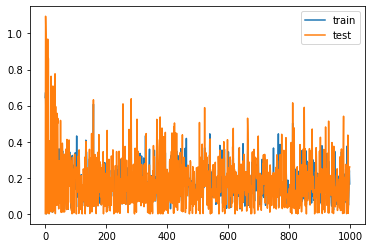

In [29]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_scaled_training_df[rand_int]

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    lstm_model.reset_states()
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [30]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [31]:
rmse

82.1865373010244

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run without min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4477.6426 - val_loss: 3508.6189
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 10001.3066 - val_loss: 9997.8682
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6497.9316 - val_loss: 5795.8882
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9532.6279 - val_loss: 9518.4209
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9291.3438 - val_loss: 9599.8359
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9221.7500 - val_loss: 9495.7344
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9963.5645 - val_loss: 10021.2988
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4113.0415 - val_loss: 4991.5898
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5280.3740 - val_loss: 3993.0940
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4976.0342

EPOCH: 81 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6364.7983 - val_loss: 9561.0791
EPOCH: 82 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9176.0293 - val_loss: 9150.0098
EPOCH: 83 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9032.5547 - val_loss: 8972.8467
EPOCH: 84 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9527.4062 - val_loss: 9529.1104
EPOCH: 85 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5609.6772 - val_loss: 5608.0674
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9308.5645 - val_loss: 9231.0195
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3587.0879 - val_loss: 2049.2219
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6570.1934 - val_loss: 6567.7217
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3344.1167 - val_loss: 3519.0908
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 85

EPOCH: 160 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6510.2671 - val_loss: 6508.5215
EPOCH: 161 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7790.8584 - val_loss: 7755.1006
EPOCH: 162 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6430.6055 - val_loss: 6328.1885
EPOCH: 163 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2976.0349 - val_loss: 2855.5447
EPOCH: 164 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7730.9346 - val_loss: 7685.4468
EPOCH: 165 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8958.1270 - val_loss: 8948.3105
EPOCH: 166 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5770.9053 - val_loss: 5836.8159
EPOCH: 167 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6407.2090 - val_loss: 6833.5542
EPOCH: 168 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5073.6265 - val_loss: 5071.7832
EPOCH: 169 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 239 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6967.3818 - val_loss: 6287.1270
EPOCH: 240 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2931.1309 - val_loss: 2892.1050
EPOCH: 241 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4424.0601 - val_loss: 4212.5601
EPOCH: 242 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7548.1919 - val_loss: 7672.5781
EPOCH: 243 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2063.8875 - val_loss: 2001.7316
EPOCH: 244 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8704.6387 - val_loss: 8286.0332
EPOCH: 245 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2995.3701 - val_loss: 2541.6436
EPOCH: 246 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4846.2271 - val_loss: 3654.3599
EPOCH: 247 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8697.4463 - val_loss: 8278.9766
EPOCH: 248 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 318 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6502.8423 - val_loss: 6408.9067
EPOCH: 319 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3561.8113 - val_loss: 2766.5789
EPOCH: 320 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4937.7539 - val_loss: 1766.6526
EPOCH: 321 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8369.1318 - val_loss: 8680.8633
EPOCH: 322 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3969.6511 - val_loss: 3758.4438
EPOCH: 323 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7826.7427 - val_loss: 6970.9214
EPOCH: 324 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4114.3330 - val_loss: 4069.8962
EPOCH: 325 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7434.3960 - val_loss: 7865.1152
EPOCH: 326 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3993.6194 - val_loss: 4041.8269
EPOCH: 327 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 397 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3318.1365 - val_loss: 3316.9302
EPOCH: 398 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8440.5713 - val_loss: 8739.6562
EPOCH: 399 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5640.9844 - val_loss: 5616.7749
EPOCH: 400 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5716.2148 - val_loss: 8697.3184
EPOCH: 401 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5540.0049 - val_loss: 8311.3750
EPOCH: 402 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8196.1797 - val_loss: 6417.2734
EPOCH: 403 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8381.1650 - val_loss: 8453.9434
EPOCH: 404 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4582.6162 - val_loss: 4580.8716
EPOCH: 405 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8247.0986 - val_loss: 8303.4873
EPOCH: 406 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 476 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7077.7583 - val_loss: 8540.6592
EPOCH: 477 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8367.2070 - val_loss: 8368.5420
EPOCH: 478 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4940.2163 - val_loss: 4965.9316
EPOCH: 479 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4938.7593 - val_loss: 4964.4790
EPOCH: 480 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5498.1914 - val_loss: 5483.2153
EPOCH: 481 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6882.4775 - val_loss: 6980.1313
EPOCH: 482 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8473.2354 - val_loss: 8598.4131
EPOCH: 483 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7245.3975 - val_loss: 7279.9790
EPOCH: 484 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6482.1958 - val_loss: 5826.0586
EPOCH: 485 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 555 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4764.7886 - val_loss: 4844.3032
EPOCH: 556 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8062.8569 - val_loss: 8199.0283
EPOCH: 557 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5364.2173 - val_loss: 5334.2891
EPOCH: 558 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5929.3286 - val_loss: 3614.8826
EPOCH: 559 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2367.4084 - val_loss: 2215.2900
EPOCH: 560 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8186.4116 - val_loss: 8309.3545
EPOCH: 561 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7744.0132 - val_loss: 7741.8560
EPOCH: 562 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7590.4404 - val_loss: 7574.6934
EPOCH: 563 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2072.0432 - val_loss: 623.1808
EPOCH: 564 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s -

EPOCH: 634 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3938.0115 - val_loss: 4193.5752
EPOCH: 635 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6642.8818 - val_loss: 6122.4395
EPOCH: 636 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7256.5459 - val_loss: 7247.8047
EPOCH: 637 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3788.7410 - val_loss: 4160.6416
EPOCH: 638 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5861.1162 - val_loss: 6007.9009
EPOCH: 639 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5877.7441 - val_loss: 2840.7700
EPOCH: 640 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7550.7070 - val_loss: 7918.6670
EPOCH: 641 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5196.5200 - val_loss: 5194.7998
EPOCH: 642 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4642.3306 - val_loss: 4377.5610
EPOCH: 643 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 713 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3636.4338 - val_loss: 3849.8606
EPOCH: 714 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1923.8384 - val_loss: 539.9354
EPOCH: 715 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3326.3188 - val_loss: 3286.2654
EPOCH: 716 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2492.6016 - val_loss: 2491.5767
EPOCH: 717 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5990.9424 - val_loss: 4489.7075
EPOCH: 718 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7463.4619 - val_loss: 7481.3115
EPOCH: 719 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3364.3303 - val_loss: 3167.8943
EPOCH: 720 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7370.5879 - val_loss: 7425.8315
EPOCH: 721 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7425.8320 - val_loss: 7423.9326
EPOCH: 722 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s -

EPOCH: 792 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7299.4287 - val_loss: 7197.8340
EPOCH: 793 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1966.0400 - val_loss: 1965.1727
EPOCH: 794 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1491.7161 - val_loss: 1476.1643
EPOCH: 795 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4959.1006 - val_loss: 4957.7622
EPOCH: 796 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4471.0791 - val_loss: 4529.5347
EPOCH: 797 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6190.2915 - val_loss: 6303.0967
EPOCH: 798 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7656.8066 - val_loss: 7740.8208
EPOCH: 799 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5055.5625 - val_loss: 5266.6616
EPOCH: 800 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6667.7202 - val_loss: 6570.9507
EPOCH: 801 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 871 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 819.7999 - val_loss: 819.3144
EPOCH: 872 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5982.2979 - val_loss: 5946.7090
EPOCH: 873 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3691.0176 - val_loss: 2652.8826
EPOCH: 874 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7575.2954 - val_loss: 7481.7275
EPOCH: 875 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5526.1772 - val_loss: 5578.2456
EPOCH: 876 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6098.4053 - val_loss: 6508.9570
EPOCH: 877 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1691.2487 - val_loss: 1344.6101
EPOCH: 878 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7063.8892 - val_loss: 7337.5396
EPOCH: 879 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7666.6548 - val_loss: 7664.9360
EPOCH: 880 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - 

EPOCH: 950 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7331.9351 - val_loss: 7405.0034
EPOCH: 951 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4840.4194 - val_loss: 5047.1001
EPOCH: 952 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6315.8193 - val_loss: 6762.3267
EPOCH: 953 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4738.0332 - val_loss: 4736.7100
EPOCH: 954 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4705.8691 - val_loss: 6759.1641
EPOCH: 955 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4913.2412 - val_loss: 3387.7615
EPOCH: 956 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2417.9319 - val_loss: 2479.5503
EPOCH: 957 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4394.6826 - val_loss: 4314.6079
EPOCH: 958 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4056.7778 - val_loss: 4080.1809
EPOCH: 959 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

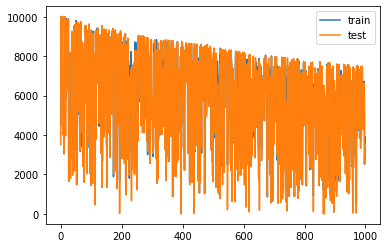

In [32]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [33]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [34]:
rmse

69.26184941499749

In [35]:
predicted

[13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.638225,
 13.

# Start of second method of lstm time series forecasting

In [36]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [37]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [38]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# View one time series

In [39]:
for i in range(22):
    print(list_of_row_components[i])

[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]


# Get length of list of lists

In [40]:
len(list_of_row_components)

11506

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [41]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Convert format of list to have a single time series for each index

In [42]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [43]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

# Perform train test split for dataset

In [44]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


In [45]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


# Build LSTM model

In [46]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, dropout=0.2, recurrent_dropout=0.2, input_shape=(train_X.shape[1], train_X.shape[2])),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [47]:
lstm_model.compile(loss='mae', optimizer='adam')

# Train model

In [48]:
history = lstm_model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/1000
5/5 - 0s - loss: 74.9505 - val_loss: 73.7611
Epoch 2/1000
5/5 - 0s - loss: 73.8199 - val_loss: 73.0095
Epoch 3/1000
5/5 - 0s - loss: 73.0317 - val_loss: 72.2482
Epoch 4/1000
5/5 - 0s - loss: 72.1694 - val_loss: 71.1122
Epoch 5/1000
5/5 - 0s - loss: 71.1278 - val_loss: 70.2280
Epoch 6/1000
5/5 - 0s - loss: 69.8521 - val_loss: 69.0503
Epoch 7/1000
5/5 - 0s - loss: 68.2418 - val_loss: 67.6549
Epoch 8/1000
5/5 - 0s - loss: 66.2733 - val_loss: 65.3579
Epoch 9/1000
5/5 - 0s - loss: 64.0499 - val_loss: 62.4211
Epoch 10/1000
5/5 - 0s - loss: 61.8745 - val_loss: 60.5158
Epoch 11/1000
5/5 - 0s - loss: 59.6103 - val_loss: 58.4783
Epoch 12/1000
5/5 - 0s - loss: 57.2095 - val_loss: 55.3341
Epoch 13/1000
5/5 - 0s - loss: 54.3914 - val_loss: 52.0440
Epoch 14/1000
5/5 - 0s - loss: 51.6278 - val_loss: 48.9866
Epoch 15/1000
5/5 - 0s - loss: 48.5120 - val_loss: 45.0772
Epoch 16/1000
5/5 - 0s - loss: 45.1485 - val_loss: 41.7976
Epoch 17/1000
5/5 - 0s - loss: 41.3966 - val_loss: 38.3329
Epoch 

Epoch 144/1000
5/5 - 0s - loss: 0.0991 - val_loss: 0.0767
Epoch 145/1000
5/5 - 0s - loss: 0.0903 - val_loss: 0.0601
Epoch 146/1000
5/5 - 0s - loss: 0.0768 - val_loss: 0.0607
Epoch 147/1000
5/5 - 0s - loss: 0.0961 - val_loss: 0.0154
Epoch 148/1000
5/5 - 0s - loss: 0.0516 - val_loss: 0.0420
Epoch 149/1000
5/5 - 0s - loss: 0.1136 - val_loss: 0.1304
Epoch 150/1000
5/5 - 0s - loss: 0.0944 - val_loss: 0.1052
Epoch 151/1000
5/5 - 0s - loss: 0.1056 - val_loss: 0.0160
Epoch 152/1000
5/5 - 0s - loss: 0.0396 - val_loss: 0.0965
Epoch 153/1000
5/5 - 0s - loss: 0.0935 - val_loss: 0.0497
Epoch 154/1000
5/5 - 0s - loss: 0.0925 - val_loss: 0.1054
Epoch 155/1000
5/5 - 0s - loss: 0.0832 - val_loss: 0.0125
Epoch 156/1000
5/5 - 0s - loss: 0.0785 - val_loss: 0.0195
Epoch 157/1000
5/5 - 0s - loss: 0.0988 - val_loss: 0.0987
Epoch 158/1000
5/5 - 0s - loss: 0.0723 - val_loss: 0.1322
Epoch 159/1000
5/5 - 0s - loss: 0.1235 - val_loss: 0.1008
Epoch 160/1000
5/5 - 0s - loss: 0.1362 - val_loss: 0.0429
Epoch 161/1000

5/5 - 0s - loss: 0.0569 - val_loss: 0.1233
Epoch 286/1000
5/5 - 0s - loss: 0.0800 - val_loss: 0.1033
Epoch 287/1000
5/5 - 0s - loss: 0.0909 - val_loss: 0.0123
Epoch 288/1000
5/5 - 0s - loss: 0.0465 - val_loss: 0.1073
Epoch 289/1000
5/5 - 0s - loss: 0.0971 - val_loss: 0.0021
Epoch 290/1000
5/5 - 0s - loss: 0.0593 - val_loss: 0.1627
Epoch 291/1000
5/5 - 0s - loss: 0.1190 - val_loss: 0.1945
Epoch 292/1000
5/5 - 0s - loss: 0.1150 - val_loss: 9.0027e-04
Epoch 293/1000
5/5 - 0s - loss: 0.0927 - val_loss: 0.0678
Epoch 294/1000
5/5 - 0s - loss: 0.0653 - val_loss: 0.0821
Epoch 295/1000
5/5 - 0s - loss: 0.0805 - val_loss: 0.0266
Epoch 296/1000
5/5 - 0s - loss: 0.0762 - val_loss: 0.0775
Epoch 297/1000
5/5 - 0s - loss: 0.0821 - val_loss: 0.0289
Epoch 298/1000
5/5 - 0s - loss: 0.0570 - val_loss: 0.0882
Epoch 299/1000
5/5 - 0s - loss: 0.0494 - val_loss: 0.1280
Epoch 300/1000
5/5 - 0s - loss: 0.0778 - val_loss: 0.1024
Epoch 301/1000
5/5 - 0s - loss: 0.0869 - val_loss: 0.0022
Epoch 302/1000
5/5 - 0s -

Epoch 427/1000
5/5 - 0s - loss: 0.0415 - val_loss: 0.0746
Epoch 428/1000
5/5 - 0s - loss: 0.0726 - val_loss: 0.1259
Epoch 429/1000
5/5 - 0s - loss: 0.1298 - val_loss: 0.1297
Epoch 430/1000
5/5 - 0s - loss: 0.0650 - val_loss: 0.0434
Epoch 431/1000
5/5 - 0s - loss: 0.0395 - val_loss: 0.0103
Epoch 432/1000
5/5 - 0s - loss: 0.1038 - val_loss: 0.1271
Epoch 433/1000
5/5 - 0s - loss: 0.1599 - val_loss: 0.0778
Epoch 434/1000
5/5 - 0s - loss: 0.0508 - val_loss: 0.0261
Epoch 435/1000
5/5 - 0s - loss: 0.0384 - val_loss: 0.0045
Epoch 436/1000
5/5 - 0s - loss: 0.0210 - val_loss: 0.0615
Epoch 437/1000
5/5 - 0s - loss: 0.0486 - val_loss: 0.0017
Epoch 438/1000
5/5 - 0s - loss: 0.0459 - val_loss: 0.1734
Epoch 439/1000
5/5 - 0s - loss: 0.1211 - val_loss: 0.1832
Epoch 440/1000
5/5 - 0s - loss: 0.1022 - val_loss: 0.0072
Epoch 441/1000
5/5 - 0s - loss: 0.0300 - val_loss: 0.0342
Epoch 442/1000
5/5 - 0s - loss: 0.0341 - val_loss: 0.0516
Epoch 443/1000
5/5 - 0s - loss: 0.0312 - val_loss: 0.0401
Epoch 444/1000

5/5 - 0s - loss: 0.1001 - val_loss: 0.0262
Epoch 569/1000
5/5 - 0s - loss: 0.0241 - val_loss: 0.0473
Epoch 570/1000
5/5 - 0s - loss: 0.0366 - val_loss: 0.0522
Epoch 571/1000
5/5 - 0s - loss: 0.0422 - val_loss: 0.0187
Epoch 572/1000
5/5 - 0s - loss: 0.0370 - val_loss: 0.0701
Epoch 573/1000
5/5 - 0s - loss: 0.0699 - val_loss: 0.1233
Epoch 574/1000
5/5 - 0s - loss: 0.1259 - val_loss: 0.1287
Epoch 575/1000
5/5 - 0s - loss: 0.0683 - val_loss: 0.0175
Epoch 576/1000
5/5 - 0s - loss: 0.0373 - val_loss: 0.0299
Epoch 577/1000
5/5 - 0s - loss: 0.0394 - val_loss: 9.6893e-04
Epoch 578/1000
5/5 - 0s - loss: 0.0400 - val_loss: 0.1602
Epoch 579/1000
5/5 - 0s - loss: 0.1175 - val_loss: 0.2076
Epoch 580/1000
5/5 - 0s - loss: 0.1299 - val_loss: 0.2322
Epoch 581/1000
5/5 - 0s - loss: 0.1506 - val_loss: 0.2920
Epoch 582/1000
5/5 - 0s - loss: 0.1756 - val_loss: 0.1364
Epoch 583/1000
5/5 - 0s - loss: 0.0919 - val_loss: 0.0217
Epoch 584/1000
5/5 - 0s - loss: 0.0226 - val_loss: 0.0158
Epoch 585/1000
5/5 - 0s -

Epoch 710/1000
5/5 - 0s - loss: 0.0379 - val_loss: 0.0320
Epoch 711/1000
5/5 - 0s - loss: 0.0354 - val_loss: 0.0542
Epoch 712/1000
5/5 - 0s - loss: 0.0380 - val_loss: 0.0659
Epoch 713/1000
5/5 - 0s - loss: 0.0285 - val_loss: 0.0908
Epoch 714/1000
5/5 - 0s - loss: 0.0791 - val_loss: 0.0477
Epoch 715/1000
5/5 - 0s - loss: 0.0526 - val_loss: 0.1279
Epoch 716/1000
5/5 - 0s - loss: 0.0647 - val_loss: 0.0406
Epoch 717/1000
5/5 - 0s - loss: 0.0205 - val_loss: 0.0077
Epoch 718/1000
5/5 - 0s - loss: 0.0214 - val_loss: 0.0038
Epoch 719/1000
5/5 - 0s - loss: 0.0177 - val_loss: 0.0157
Epoch 720/1000
5/5 - 0s - loss: 0.0381 - val_loss: 0.0446
Epoch 721/1000
5/5 - 0s - loss: 0.0730 - val_loss: 0.0535
Epoch 722/1000
5/5 - 0s - loss: 0.0726 - val_loss: 0.0313
Epoch 723/1000
5/5 - 0s - loss: 0.0510 - val_loss: 0.0457
Epoch 724/1000
5/5 - 0s - loss: 0.0686 - val_loss: 0.0627
Epoch 725/1000
5/5 - 0s - loss: 0.0769 - val_loss: 0.0190
Epoch 726/1000
5/5 - 0s - loss: 0.0462 - val_loss: 0.0700
Epoch 727/1000

5/5 - 0s - loss: 0.1387 - val_loss: 0.1139
Epoch 852/1000
5/5 - 0s - loss: 0.0920 - val_loss: 0.1700
Epoch 853/1000
5/5 - 0s - loss: 0.1063 - val_loss: 0.0195
Epoch 854/1000
5/5 - 0s - loss: 0.1226 - val_loss: 0.0598
Epoch 855/1000
5/5 - 0s - loss: 0.0781 - val_loss: 0.1797
Epoch 856/1000
5/5 - 0s - loss: 0.1207 - val_loss: 0.0960
Epoch 857/1000
5/5 - 0s - loss: 0.1130 - val_loss: 0.1110
Epoch 858/1000
5/5 - 0s - loss: 0.0663 - val_loss: 0.0436
Epoch 859/1000
5/5 - 0s - loss: 0.0330 - val_loss: 0.0132
Epoch 860/1000
5/5 - 0s - loss: 0.0326 - val_loss: 0.0114
Epoch 861/1000
5/5 - 0s - loss: 0.0341 - val_loss: 0.0620
Epoch 862/1000
5/5 - 0s - loss: 0.0389 - val_loss: 0.0513
Epoch 863/1000
5/5 - 0s - loss: 0.0369 - val_loss: 0.0206
Epoch 864/1000
5/5 - 0s - loss: 0.0355 - val_loss: 0.0180
Epoch 865/1000
5/5 - 0s - loss: 0.0356 - val_loss: 0.0419
Epoch 866/1000
5/5 - 0s - loss: 0.0394 - val_loss: 0.0079
Epoch 867/1000
5/5 - 0s - loss: 0.0429 - val_loss: 0.1629
Epoch 868/1000
5/5 - 0s - los

Epoch 993/1000
5/5 - 0s - loss: 0.1514 - val_loss: 0.2071
Epoch 994/1000
5/5 - 0s - loss: 0.1397 - val_loss: 0.1205
Epoch 995/1000
5/5 - 0s - loss: 0.0612 - val_loss: 0.0151
Epoch 996/1000
5/5 - 0s - loss: 0.0355 - val_loss: 0.0327
Epoch 997/1000
5/5 - 0s - loss: 0.0377 - val_loss: 0.0176
Epoch 998/1000
5/5 - 0s - loss: 0.0354 - val_loss: 0.0401
Epoch 999/1000
5/5 - 0s - loss: 0.0457 - val_loss: 0.1003
Epoch 1000/1000
5/5 - 0s - loss: 0.0840 - val_loss: 0.0279


# Plot model loss and validation loss

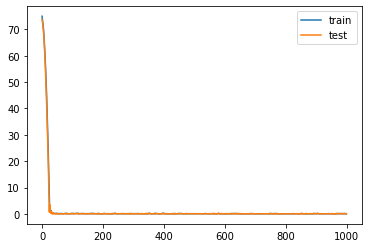

In [49]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Make predictions based on test set and get a root mean squared error 

In [50]:
from sklearn.metrics import mean_squared_error

yhat = lstm_model.predict(test_X)
mse = mean_squared_error(test_y, yhat)
rmse = math.sqrt(mse)

In [51]:
rmse

0.02786102294922443